In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thu thập và tiền xử lý dữ liệu

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

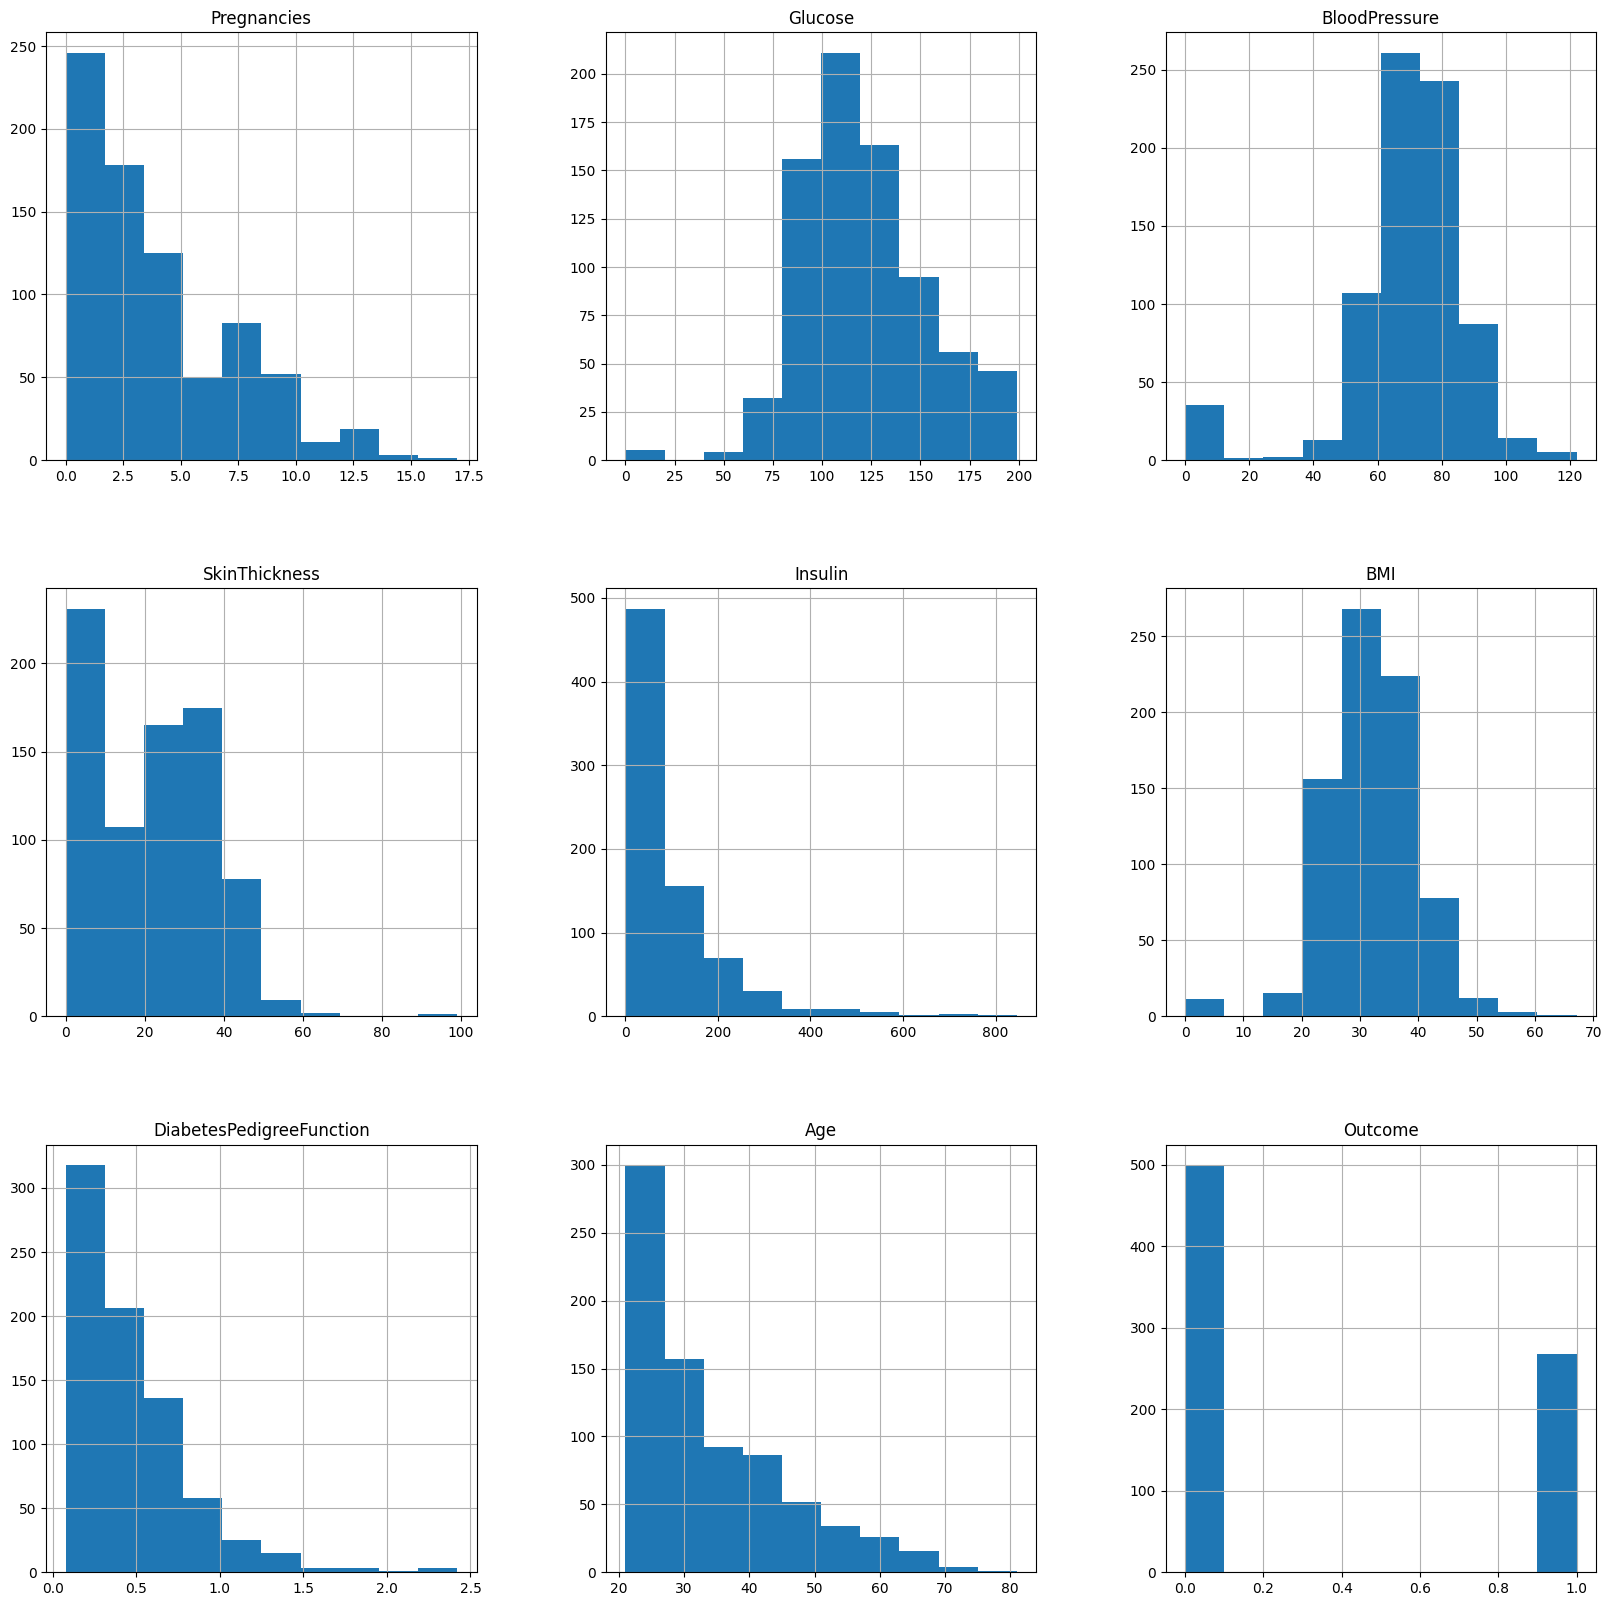

In [5]:
df.hist(figsize= (20,20))

## Kiểm tra số lượng mẫu có giá trị bằng 0

Nhận xét thấy dữ liệu trong các trường Glucose, BloodPressure, SkinThickness, Insulin, BMI có chứa các giá trị 0 là giá trị không thể xảy ra trên thực tế. Những giá trị này có thể là lỗi nhập liệu, missing value và cần được xử lý

Thay thế các giá trị 0 trong các trường trên thành giá trị NaN:

In [6]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]= df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

Đếm các giá trị 0:

In [7]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Có rất nhiều mẫu chứa giá trị 0 nên việc bỏ đi các mẫu này sẽ gây mất thông tin quan trọng từ các thuộc tính có giá trị khác 0 khác nên sẽ cần điền lại giá trị cho các mẫu này

Tiến hành điền bằng cách thay thế các giá trị trống bằng giá trị mean của các mẫu cùng nhãn lớp

In [8]:
def class_fill_na(column):
    not_null_val = df[df[column].notnull()][[column, 'Outcome']]
    mean_value = not_null_val.groupby(['Outcome'])[[column]].mean().reset_index()
    df.loc[(df['Outcome'] == 0) & (df[column].isnull()), column] = mean_value[column][0]
    df.loc[(df['Outcome'] == 1) & (df[column].isnull()), column] = mean_value[column][1]

In [9]:
columns= ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns:
    class_fill_na(column)

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Biến đổi đặc trưng

### Glucose

https://www.vinmec.com/vie/bai-viet/chi-so-glucose-trong-mau-o-muc-bao-nhieu-la-mac-benh-tieu-duong-vi

In [11]:
New_Glucose = pd.Series(['Normal', 'Prediabetes', 'Diabetes'], dtype='category')

In [12]:
New_Glucose

0         Normal
1    Prediabetes
2       Diabetes
dtype: category
Categories (3, object): ['Diabetes', 'Normal', 'Prediabetes']

In [13]:
df['New_Glucose'] = New_Glucose
df.loc[df['Glucose'] < 140, 'New_Glucose'] = New_Glucose[0]
df.loc[(df['Glucose'] >= 140) & (df['Glucose'] <= 200), 'New_Glucose'] = New_Glucose[1]
df.loc[df['Glucose'] > 200, 'New_Glucose'] = New_Glucose[2]

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1,Prediabetes
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0,Normal
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1,Prediabetes
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,Normal
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,Normal


### BMI

https://medlatec.vn/bmi-online?gad_source=1&gad_campaignid=22225949037&gbraid=0AAAAADN9HXy5Q5E352aBRw7ImqcwX5DCt&gclid=Cj0KCQjw_JzABhC2ARIsAPe3ynpm_WXIRb1GNjkQR6ggVfFIF7HQrhBiqzevCbF1-OF_sZSDC_yFst8aAuLvEALw_wcB

In [15]:
New_BMI = pd.Series(['Underweight', 'Healthy', 'Overweight', 'Obese I', 'Obese II', 'Obese III'], dtype='category')

In [16]:
New_BMI

0    Underweight
1        Healthy
2     Overweight
3        Obese I
4       Obese II
5      Obese III
dtype: category
Categories (6, object): ['Healthy', 'Obese I', 'Obese II', 'Obese III', 'Overweight', 'Underweight']

In [17]:
df['New_BMI'] = New_BMI
df.loc[df['BMI'] < 18.5, 'New_BMI'] = New_BMI[0]
df.loc[(df['BMI'] >= 18.5) & (df['BMI'] < 25), 'New_BMI'] = New_BMI[1]
df.loc[(df['BMI'] >= 25) & (df['BMI'] < 30), 'New_BMI'] = New_BMI[2]
df.loc[(df['BMI'] >= 30) & (df['BMI'] < 35), 'New_BMI'] = New_BMI[3]
df.loc[(df['BMI'] >= 35) & (df['BMI'] < 40), 'New_BMI'] = New_BMI[4]
df.loc[df['BMI'] >= 40, 'New_BMI'] = New_BMI[5]

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose,New_BMI
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1,Prediabetes,Obese I
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0,Normal,Overweight
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1,Prediabetes,Healthy
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,Normal,Overweight
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,Normal,Obese III


### BloodPressure

https://medlineplus.gov/highbloodpressure.html

In [19]:
New_Blood_Pressure = pd.Series(['Normal', 'High Blood Pressure Stage I', 'High Blood Pressure Stage II', 'Hypertensive Crisis'], dtype= 'category')

In [20]:
New_Blood_Pressure

0                          Normal
1     High Blood Pressure Stage I
2    High Blood Pressure Stage II
3             Hypertensive Crisis
dtype: category
Categories (4, object): ['High Blood Pressure Stage I', 'High Blood Pressure Stage II', 'Hypertensive Crisis', 'Normal']

In [21]:
df['New_Blood_Pressure'] = New_Blood_Pressure
df.loc[df['BloodPressure'] < 80, 'New_Blood_Pressure'] = New_Blood_Pressure[0]
df.loc[(df['BloodPressure'] >= 80) & (df['BloodPressure'] < 90), 'New_Blood_Pressure'] = New_Blood_Pressure[1]
df.loc[(df['BloodPressure'] >= 90) & (df['BloodPressure'] < 120), 'New_Blood_Pressure'] = New_Blood_Pressure[2]
df.loc[(df['BloodPressure'] >= 90) & (df['BloodPressure'] < 120), 'New_Blood_Pressure'] = New_Blood_Pressure[2]
df.loc[df['BloodPressure'] >= 120, 'New_Blood_Pressure'] = New_Blood_Pressure[3]

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose,New_BMI,New_Blood_Pressure
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1,Prediabetes,Obese I,Normal
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0,Normal,Overweight,Normal
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1,Prediabetes,Healthy,Normal
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,Normal,Overweight,Normal
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,Normal,Obese III,Normal


### Insulin

https://medlatec.vn/tin-tuc/insulin--hormon-giup-dieu-hoa-luong-duong-trong-mau%C2%A0-s159-n18195#:~:text=Insulin%20l%C3%A0%20m%E1%BB%99t%20hormon%20c%C3%B3,276%2C0%20%C2%B5U%2FmL.

In [23]:
New_Insulin = pd.Series(['Normal', 'Abnormal'], dtype= 'category')

In [24]:
New_Insulin

0      Normal
1    Abnormal
dtype: category
Categories (2, object): ['Abnormal', 'Normal']

In [25]:
df['New_Insulin'] = New_Insulin
df.loc[df['Insulin'] < 16, 'New_Insulin'] = New_Insulin[1]
df.loc[(df['Insulin'] >= 16) & (df['Insulin'] <= 166), 'New_Insulin'] = New_Insulin[0]
df.loc[df['Insulin'] > 166, 'New_Insulin'] = New_Insulin[1]

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose,New_BMI,New_Blood_Pressure,New_Insulin
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1,Prediabetes,Obese I,Normal,Abnormal
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0,Normal,Overweight,Normal,Normal
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1,Prediabetes,Healthy,Normal,Abnormal
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,Normal,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,Normal,Obese III,Normal,Abnormal


## Mã hóa OneHotEncoding cho các trường nhị phân

In [27]:
df = pd.get_dummies(df, columns = ["New_Glucose", "New_BMI", "New_Blood_Pressure", "New_Insulin"])#, drop_first= True)

In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Diabetes,...,New_BMI_Obese II,New_BMI_Obese III,New_BMI_Overweight,New_BMI_Underweight,New_Blood_Pressure_High Blood Pressure Stage I,New_Blood_Pressure_High Blood Pressure Stage II,New_Blood_Pressure_Hypertensive Crisis,New_Blood_Pressure_Normal,New_Insulin_Abnormal,New_Insulin_Normal
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1,False,...,False,False,False,False,False,False,False,True,True,False
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0,False,...,False,False,True,False,False,False,False,True,False,True
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1,False,...,False,False,False,False,False,False,False,True,True,False
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,False,...,False,False,True,False,False,False,False,True,False,True
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,False,...,False,True,False,False,False,False,False,True,True,False


In [29]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'New_Glucose_Diabetes', 'New_Glucose_Normal', 'New_Glucose_Prediabetes',
       'New_BMI_Healthy', 'New_BMI_Obese I', 'New_BMI_Obese II',
       'New_BMI_Obese III', 'New_BMI_Overweight', 'New_BMI_Underweight',
       'New_Blood_Pressure_High Blood Pressure Stage I',
       'New_Blood_Pressure_High Blood Pressure Stage II',
       'New_Blood_Pressure_Hypertensive Crisis', 'New_Blood_Pressure_Normal',
       'New_Insulin_Abnormal', 'New_Insulin_Normal'],
      dtype='object')

In [30]:
categorical_df = df[['New_Glucose_Diabetes', 'New_Glucose_Normal', 'New_Glucose_Prediabetes',
       'New_BMI_Healthy', 'New_BMI_Obese I', 'New_BMI_Obese II',
       'New_BMI_Obese III', 'New_BMI_Overweight', 'New_BMI_Underweight',
       'New_Blood_Pressure_High Blood Pressure Stage I',
       'New_Blood_Pressure_High Blood Pressure Stage II',
       'New_Blood_Pressure_Hypertensive Crisis', 'New_Blood_Pressure_Normal',
       'New_Insulin_Abnormal', 'New_Insulin_Normal']]

In [31]:
categorical_df

,New_Glucose_Diabetes,New_Glucose_Normal,New_Glucose_Prediabetes,New_BMI_Healthy,New_BMI_Obese I,New_BMI_Obese II,New_BMI_Obese III,New_BMI_Overweight,New_BMI_Underweight,New_Blood_Pressure_High Blood Pressure Stage I,New_Blood_Pressure_High Blood Pressure Stage II,New_Blood_Pressure_Hypertensive Crisis,New_Blood_Pressure_Normal,New_Insulin_Abnormal,New_Insulin_Normal
0,False,False,True,False,True,False,False,False,False,False,False,False,True,True,False
1,False,True,False,False,False,False,False,True,False,False,False,False,True,False,True
2,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False
3,False,True,False,False,False,False,False,True,False,False,False,False,True,False,True
4,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False
764,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True
765,False,True,False,False,False,False,False,True,False,False,False,False,True,False,True
766,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False


In [32]:
y=df['Outcome']
X=df.drop(['Outcome','New_Glucose_Diabetes', 'New_Glucose_Normal', 'New_Glucose_Prediabetes',
       'New_BMI_Healthy', 'New_BMI_Obese I', 'New_BMI_Obese II',
       'New_BMI_Obese III', 'New_BMI_Overweight', 'New_BMI_Underweight',
       'New_Blood_Pressure_High Blood Pressure Stage I',
       'New_Blood_Pressure_High Blood Pressure Stage II',
       'New_Blood_Pressure_Hypertensive Crisis', 'New_Blood_Pressure_Normal',
       'New_Insulin_Abnormal', 'New_Insulin_Normal'], axis=1)


In [33]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33


In [34]:
# from sklearn.preprocessing import RobustScaler
# cols = X.columns
# index = X.index
# transformer = RobustScaler().fit(X)
# X=transformer.transform(X)
# X=pd.DataFrame(X, columns = cols, index = index)

In [35]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33


In [36]:
X = pd.concat([X, categorical_df], axis=1)
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,New_Glucose_Diabetes,New_Glucose_Normal,...,New_BMI_Obese II,New_BMI_Obese III,New_BMI_Overweight,New_BMI_Underweight,New_Blood_Pressure_High Blood Pressure Stage I,New_Blood_Pressure_High Blood Pressure Stage II,New_Blood_Pressure_Hypertensive Crisis,New_Blood_Pressure_Normal,New_Insulin_Abnormal,New_Insulin_Normal
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,False,False,...,False,False,False,False,False,False,False,True,True,False
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,False,True,...,False,False,True,False,False,False,False,True,False,True
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,False,False,...,False,False,False,False,False,False,False,True,True,False
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,False,True,...,False,False,True,False,False,False,False,True,False,True
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,False,True,...,False,True,False,False,False,False,False,True,True,False


## Chia tập dữ liệu

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify= y)


## Chuẩn hóa bằng RobustScaler

In [39]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [40]:
scaler =StandardScaler()
r_scaler = RobustScaler()
X_train = r_scaler.fit_transform(X_train)
X_test = r_scaler.transform(X_test)
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


# Huấn luyện mô hình

## KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [42]:
def print_scores(y_true, y_pred):
    print(classification_report(y_true, y_pred))

In [43]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(estimator= KNeighborsClassifier(),
                           param_grid= param_grid,
                           cv= 5,
                           scoring= make_scorer(f1_score, average= 'weighted')
                           )

grid_search.fit(X_train, y_train)
print("Best param: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

knn_model = grid_search.best_estimator_
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
print_scores(y_test, y_pred)
print(knn_model.get_params())

Best param:  {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Best score:  0.8504260441277139
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       100
           1       0.78      0.85      0.81        54

    accuracy                           0.86       154
   macro avg       0.85      0.86      0.85       154
weighted avg       0.87      0.86      0.86       154

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}


## Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 15, 20, 25],
    #'max_features': ['auto', 'sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator= DecisionTreeClassifier(),
                           param_grid= param_grid,
                           scoring= make_scorer(f1_score, average= 'weighted'),
                           cv= 10)

grid_search.fit(X_train, y_train)
print("Best param: ", grid_search.best_params_)

dt_model= grid_search.best_estimator_
dt_model.fit(X_train, y_train)

y_pred= dt_model.predict(X_test)
print_scores(y_test, y_pred)

Best param:  {'criterion': 'log_loss', 'max_depth': 5}
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       100
           1       0.82      0.85      0.84        54

    accuracy                           0.88       154
   macro avg       0.87      0.88      0.87       154
weighted avg       0.88      0.88      0.88       154



## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [100, 150, 200, 250]
}

grid_search = GridSearchCV(estimator= RandomForestClassifier(),
                           param_grid= param_grid,
                           scoring= make_scorer(f1_score, average= 'weighted'),
                           cv= 10)

grid_search.fit(X_train, y_train)
print("best param: ", grid_search.best_params_)

rf_model = grid_search.best_estimator_
rf_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
print(classification_report(y_true= y_test, y_pred= y_pred))

best param:  {'criterion': 'entropy', 'n_estimators': 150}
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       100
           1       0.82      0.85      0.84        54

    accuracy                           0.88       154
   macro avg       0.87      0.88      0.87       154
weighted avg       0.88      0.88      0.88       154

